In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping, CSVLogger
%matplotlib inline
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
# 定義批次大小、類別數、epoch 數
batch_size = 128
num_classes = 10
epochs = 20

In [3]:
# 讀取 MNIST 資料
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


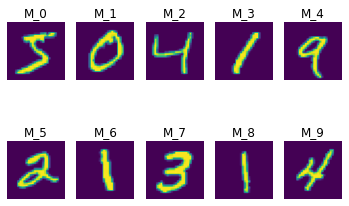

In [4]:
# 顯示 MNIST 資料中的 10 張
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.title('M_%d' % i)
    plt.axis('off')
    plt.imshow(x_train[i].reshape(28, 28), cmap=None)
plt.show()

In [0]:
# 將影像尺寸正規化
x_train = x_train.reshape(60000, 784).astype('float32')
x_test = x_test.reshape(10000, 784).astype('float32')
x_train /= 255
x_test /= 255
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [6]:
# 顯示確認
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


In [0]:
# 製作模型
model = Sequential()
model.add(Dense(512, input_shape=(784, )))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

In [8]:
# 輸出摘要
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [9]:
# 編譯模型
model.compile(loss='categorical_crossentropy',
             optimizer=RMSprop(),
             metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', patience=2)
csv_logger = CSVLogger('training.log')
hist = model.fit(x_train, y_train,
                batch_size=batch_size,
                epochs=epochs,
                verbose=1,
                validation_split=0.1,
                callbacks=[es, csv_logger])

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 7s 137us/step - loss: 0.2623 - accuracy: 0.9189 - val_loss: 0.0927 - val_accuracy: 0.9718
Epoch 2/20
54000/54000 [==============================] - 7s 135us/step - loss: 0.1071 - accuracy: 0.9675 - val_loss: 0.0806 - val_accuracy: 0.9763
Epoch 3/20
54000/54000 [==============================] - 7s 135us/step - loss: 0.0779 - accuracy: 0.9765 - val_loss: 0.0620 - val_accuracy: 0.9827
Epoch 4/20
54000/54000 [==============================] - 7s 135us/step - loss: 0.0599 - accuracy: 0.9814 - val_loss: 0.0784 - val_accuracy: 0.9785
Epoch 5/20
54000/54000 [==============================] - 7s 134us/step - loss: 0.0512 - accuracy: 0.9845 - val_loss: 0.0719 - val_accuracy: 0.9818


In [10]:
# 進行學習
score = model.evaluate(x_test, y_test, verbose=0)
print('test loss:', score[0])
print('test acc:', score[1])

test loss: 0.07847222644205468
test acc: 0.9779999852180481


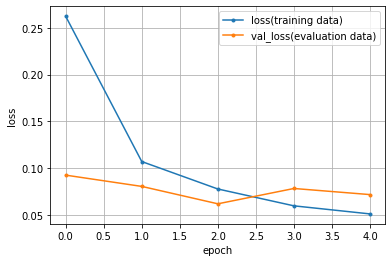

In [11]:
# 顯示學習結果
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = len(loss)
plt.plot(range(epochs), loss, marker='.', label='loss(training data)')
plt.plot(range(epochs), val_loss, marker='.', label='val_loss(evaluation data)')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()